# Hugo result plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import random
import os
sys.path.append("..")
from global_variables import *
from escape_map import EscapeMap, load_escape_map_from_csv,gen_artif_data, score_seq_batch
from utils import get_Kd

E:\ESCAPE_MAP_DRAFT\PGM\source\numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float32, 2, 'F', False, aligned=True), Array(float32, 2, 'A', False, aligned=True))
  dmean_v_dw = np.dot(s1.T, V)
E:\ESCAPE_MAP_DRAFT\PGM\source\numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float32, 1, 'A', False, aligned=True), Array(float32, 2, 'A', False, aligned=True))
  mean_V = np.dot(weights, V) / sum_weights
C:\Users\maria\AppData\Roaming\Python\Python312\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Loaded 29 KD vectors
Loaded 2 KD vectors
Loaded 671 KD vectors
Loaded 438 KD vectors


### Projections

In [2]:
sys.path.append("../")
from utils import *
from global_variables import *
from escape_map import *
pgm_path = "PGM/"
sys.path.append(pgm_path + "source/")
sys.path.append(pgm_path + "utilities/")
import utilities, Proteins_utils, sequence_logo, plots_utils
import rbm, RBM_utils

In [3]:
# seqs=Proteins_utils.load_FASTA('seq_hugo.fasta')[:,16:]
# seqs.shape

In [4]:
# import numpy as np

# # 1) Merge KD dictionaries, right-hand values override on conflicts
# ALL_KD = KD_VECTORS | NEW_KD_VECTORS

# # 2) Ordered list of antibody names
# ab_names = list(ALL_KD.keys())

# # 3) Compute log10 Kd vectors for each sequence (rows align with ab_names)
# log_kd_values = np.array([get_Kd(seq, ALL_KD, log10=True) for seq in seqs])
# # shape: (len(seqs), len(ab_names))

# # 4) Helper to find robust indices for given antibodies
# def _find_idx(names, target):
#     t = target.lower().replace("-", "").replace("_", "")
#     for i, n in enumerate(names):
#         if n.lower().replace("-", "").replace("_", "") == t:
#             return i
#     raise KeyError(f"Antibody '{target}' not found in: {names}")

# ix = {
#     k: _find_idx(ab_names, k)
#     for k in ab_names
# }

# # 5) Save values into exp_df columns, one per antibody, suffixed with `_model`
# for j, ab in enumerate(ab_names):
#     exp_df[f"{ab}_model"] = log_kd_values[:, j]


# Binding constants

In [5]:
exp_df=pd.read_csv('df_exp_complete.csv')
exp_df = exp_df[~exp_df['condition'].str.contains('_', na=False)]
exp_df.reset_index(drop=True, inplace=True)
exp_df

,seqid,esmif_lll,condition,S2E12,REGN10933,COV2-2196,C0V2-3194,VIR-7229,LY-CoV555,S309,...,S2H13_model,S2H14_model,S2H58_model,S2H97_model,S2X16_model,S2X227_model,S2X259_model,S2X35_model,S2X58_model,S304_model
0,seq_wt,-1.195354,wt,36.0,36.0,36.0,36.0,35.0,36.0,36.0,...,-6.361511,-5.946922,-8.045757,-6.125518,-8.045757,-7.958607,-6.841638,-6.747147,-7.886057,-4.841276
1,seq_ba1,-1.358970,ba1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.097524,-2.211246,-6.419352,-6.874631,-4.638869,-8.275399,-7.279710,-6.326162,-6.596358,-4.935645
2,seq_4,-1.320004,distrib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.913864,-5.509222,-8.356362,-5.924693,-7.377581,-6.470695,-6.179038,-5.167133,-7.858203,-5.407674
3,seq_5,-1.292254,distrib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.531557,-6.228456,-6.657464,-6.718198,-5.430737,-8.255039,-7.187103,-6.611933,-4.918295,-5.329282
4,seq_6,-1.272930,S2E12,3.0,3.0,3.0,36.0,35.0,4.0,36.0,...,-6.113245,-7.468229,-6.677645,-6.501965,-6.148615,-6.569138,-7.307823,-6.621357,-7.910054,-5.114007
5,seq_7,-1.260119,S2E12,6.0,3.0,16.0,2.0,35.0,24.0,36.0,...,-5.180129,-5.665902,-6.721077,-6.797105,-6.500990,-8.388905,-7.248501,-6.705608,-6.738736,-5.510179
6,seq_8,-1.253083,S2E12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.912563,-7.248612,-4.946368,-6.659958,-5.610522,-6.645411,-7.219505,-6.674219,-6.671655,-5.539690
7,seq_9,-1.295403,S2E12,1.0,3.0,1.0,1.0,37.0,3.0,38.0,...,-3.300749,-6.344642,-5.291522,-6.697917,-1.917214,-6.608085,-7.496058,-6.081426,-6.230652,-5.748754
8,seq_10,-1.260187,S309,37.0,37.0,37.0,37.0,37.0,38.0,37.0,...,-7.344651,-6.940654,-8.131474,-6.602543,-9.059964,-8.069468,-6.156518,-6.309191,-7.820805,-5.251927
9,seq_11,-1.257832,S309,37.0,37.0,36.0,36.0,36.0,7.0,37.0,...,-5.522067,-4.434850,-6.682621,-6.709303,-3.826232,-8.320230,-7.184842,-6.585577,-5.195880,-5.271978


In [6]:
exp_df

,seqid,esmif_lll,condition,S2E12,REGN10933,COV2-2196,C0V2-3194,VIR-7229,LY-CoV555,S309,...,S2H13_model,S2H14_model,S2H58_model,S2H97_model,S2X16_model,S2X227_model,S2X259_model,S2X35_model,S2X58_model,S304_model
0,seq_wt,-1.195354,wt,36.0,36.0,36.0,36.0,35.0,36.0,36.0,...,-6.361511,-5.946922,-8.045757,-6.125518,-8.045757,-7.958607,-6.841638,-6.747147,-7.886057,-4.841276
1,seq_ba1,-1.358970,ba1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.097524,-2.211246,-6.419352,-6.874631,-4.638869,-8.275399,-7.279710,-6.326162,-6.596358,-4.935645
2,seq_4,-1.320004,distrib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.913864,-5.509222,-8.356362,-5.924693,-7.377581,-6.470695,-6.179038,-5.167133,-7.858203,-5.407674
3,seq_5,-1.292254,distrib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.531557,-6.228456,-6.657464,-6.718198,-5.430737,-8.255039,-7.187103,-6.611933,-4.918295,-5.329282
4,seq_6,-1.272930,S2E12,3.0,3.0,3.0,36.0,35.0,4.0,36.0,...,-6.113245,-7.468229,-6.677645,-6.501965,-6.148615,-6.569138,-7.307823,-6.621357,-7.910054,-5.114007
5,seq_7,-1.260119,S2E12,6.0,3.0,16.0,2.0,35.0,24.0,36.0,...,-5.180129,-5.665902,-6.721077,-6.797105,-6.500990,-8.388905,-7.248501,-6.705608,-6.738736,-5.510179
6,seq_8,-1.253083,S2E12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.912563,-7.248612,-4.946368,-6.659958,-5.610522,-6.645411,-7.219505,-6.674219,-6.671655,-5.539690
7,seq_9,-1.295403,S2E12,1.0,3.0,1.0,1.0,37.0,3.0,38.0,...,-3.300749,-6.344642,-5.291522,-6.697917,-1.917214,-6.608085,-7.496058,-6.081426,-6.230652,-5.748754
8,seq_10,-1.260187,S309,37.0,37.0,37.0,37.0,37.0,38.0,37.0,...,-7.344651,-6.940654,-8.131474,-6.602543,-9.059964,-8.069468,-6.156518,-6.309191,-7.820805,-5.251927
9,seq_11,-1.257832,S309,37.0,37.0,36.0,36.0,36.0,7.0,37.0,...,-5.522067,-4.434850,-6.682621,-6.709303,-3.826232,-8.320230,-7.184842,-6.585577,-5.195880,-5.271978


In [7]:
# import matplotlib.patches as mpatches


# df_clean =exp_df.copy()

# df_clean= df_clean[df_clean['condition'].isin(['wt', 'S2E12', 'S309', 'distrib', 'SA55', 'VIR7229'])]

# #print conditions
# print(df_clean['condition'].unique())
# #remove if nan in ACE-2 column
# df_clean = df_clean.dropna(subset=['ACE-2'])
# # Rename condition 'distrib' → 'ACE2-RBM'
# df_clean['condition'] = df_clean['condition'].replace({'distrib': 'ACE2-RBM'})

# # Rename antibody 'VIR7229' to 'VIR-7229' in both columns and values
# df_clean = df_clean.rename(columns={'VIR7229': 'VIR-7229'})

# df_clean['condition'] = df_clean['condition'].replace({'VIR7229': 'VIR-7229'})
# df_clean['condition'] = df_clean['condition'].replace({'wt': 'WT'})

# # Add ACE-2 and Neg_ctr to the columns of interest

# columns_of_interest_extended  = [
#     'S2E12', 'REGN10933', 'COV2-2196', 'VIR-7229', 'LY-CoV555',
#     'S309', 'COV2-2130', 'REGN10987', 'SA55','ACE-2', 'Neg_ctr'
# ]


# # Subset and set index
# df_plot = df_clean[columns_of_interest_extended + ['condition']].copy()
# df_plot = df_plot.set_index('condition')

# # Transpose to get antibodies as columns
# df_plot_T = df_plot.T

# # Updated desired order including new controls
# desired_order = ['WT', 'ACE2-RBM', 'S2E12', 'S309', 'SA55', 'VIR-7229']
# df_plot_T = df_plot_T[desired_order]

# # Define antibody class colors
# row_colors = pd.Series(index=df_plot_T.index, dtype='object')

# class_1 = ['S2E12', 'REGN10933', 'COV2-2196', 'C0V2-3194', 'VIR-7229']
# class_3a = ['LY-CoV555']
# class_3b = ['S309', 'COV2-2130', 'REGN10987', 'LyCoV1404']
# class_4 = ['SA55']
# controls = ['ACE-2', 'Neg_ctr']

# for ab in class_1:
#     row_colors[ab] = 'blue'
# for ab in class_3a:
#     row_colors[ab] = 'orange'
# for ab in class_3b:
#     row_colors[ab] = 'green'
# for ab in class_4:
#     row_colors[ab] = 'red'
# for ab in controls:
#     row_colors[ab] = 'black'

# # Plot heatmap with updated figure and legend position
# fig, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(df_plot_T, annot=True, cmap="Blues", linewidths=0.5, fmt="1g",
#             cbar_kws={"label": "Experimental binding score", "shrink": 0.9}, ax=ax)

# # Set tick label colors
# for tick in ax.get_yticklabels():
#     ab = tick.get_text()
#     tick.set_color(row_colors.get(ab, 'black'))

# for tick in ax.get_xticklabels():
#     tick.set_color('black')

# # # Add red square for Ab pressure (when row = condition and not ACE2-RBM)
# # for i, ab in enumerate(df_plot_T.index):
# #     for j, cond in enumerate(df_plot_T.columns):
# #         if cond != 'ACE2-RBM' and cond == ab:
# #             ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', linewidth=2))

# # Add legend above the colorbar
# legend_elements = [
#     mpatches.Patch(color='blue', label='Class 1'),
#     mpatches.Patch(color='orange', label='Class 3'),
#     mpatches.Patch(color='green', label='Class 3'),
#     mpatches.Patch(color='red', label='Class 4'),
#     # mpatches.Patch(color='black', label='Control'),
#     # mpatches.Patch(edgecolor='red', facecolor='none', label='RBD with Ab pressure', linewidth=2)
# ]
# ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, frameon=True, title="Antibody Class")

# plt.xlabel("Condition", fontsize=16)
# plt.ylabel("Antibody", fontsize=16)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


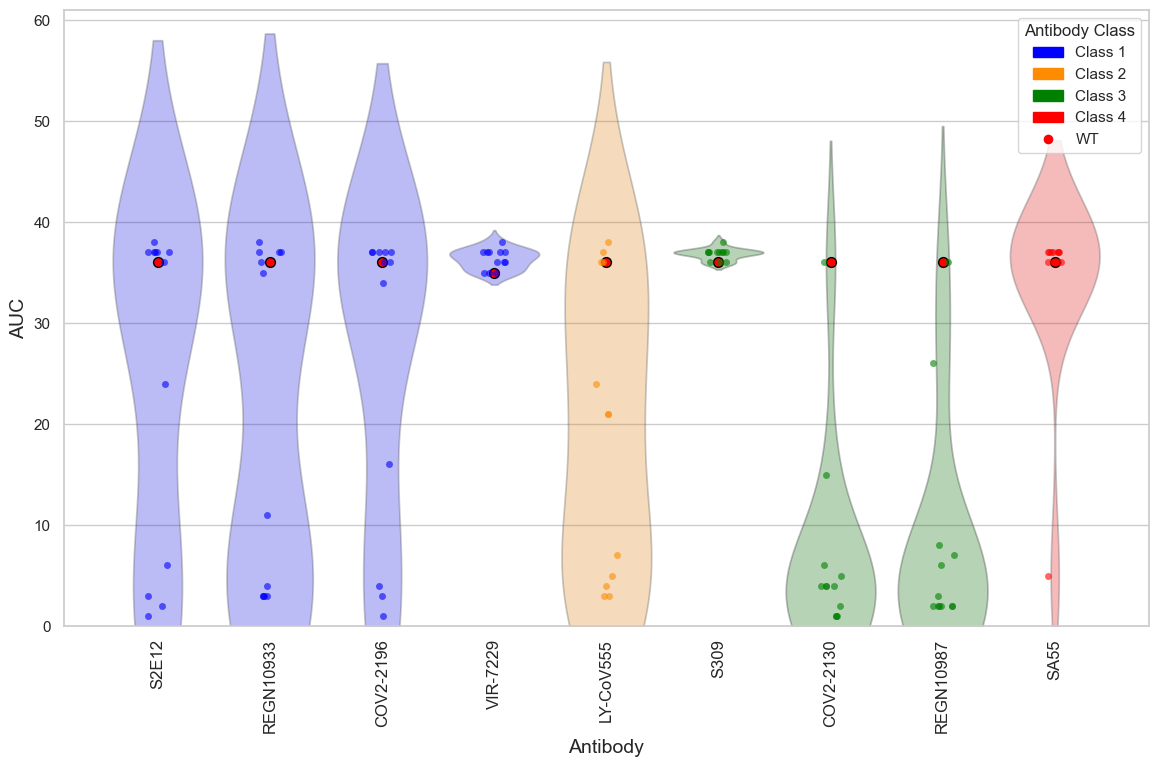

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define antibody classes and colors
class_colors = {
    "Class 1": "blue",
    "Class 2": "darkorange",
    "Class 3": "green",
    "Class 4": "red"
}

antibody_classes = {
    "Class 1": ["S2E12", "REGN10933", "COV2-2196", "C0V2-3194", "VIR-7229"],
    "Class 2": ["LY-CoV555"],
    "Class 3": ["S309", "REGN10987",'COV2-2130', 'LyCoV1404'],
    "Class 4": ["SA55"]
}

# Flatten the antibody list and create a mapping of antibodies to class colors
antibody_to_color = {}
for cls, ab_list in antibody_classes.items():
    for ab in ab_list:
        antibody_to_color[ab] = class_colors[cls]

# Define antibodies

antibodies  = [
    'S2E12', 'REGN10933', 'COV2-2196', 'VIR-7229', 'LY-CoV555',
    'S309', 'COV2-2130', 'REGN10987', 'SA55'
]
# Filter wild-type (wt) row
wt_row = exp_df[exp_df['seqid'] == 'seq_wt']

# Set up the figure
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Loop through each antibody and plot
for i, antibody in enumerate(antibodies):
    if antibody in exp_df.columns:
        data = exp_df[antibody].dropna()  # Remove NaNs

        # Get color based on antibody class
        scatter_color = antibody_to_color.get(antibody, "black")

        # Scatter plot for each antibody
        sns.stripplot(x=[i] * len(data), y=data, jitter=True, alpha=0.6, color=scatter_color)

        # Vertical KDE plot (violin plot alternative)
        sns.violinplot(x=[i] * len(data), y=data, inner=None, color=scatter_color, alpha=0.3)

        # Highlight the wild-type value in red if present
        plt.scatter(i, wt_row[antibody].values[0], color='red', s=50, edgecolor='black', label='WT' if i == 0 else "")

# Adjust x-axis labels
plt.ylim(0, 61)
plt.xticks(range(len(antibodies)), antibodies, rotation=90, fontsize=12)
plt.ylabel("AUC", fontsize=14)
plt.xlabel("Antibody", fontsize=14)

# Create legend patches for antibody classes
legend_patches = [mpatches.Patch(color=color, label=cls) for cls, color in class_colors.items()]

# Add a scatter point for WT in the legend
wt_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label="WT")

# Add legend
plt.legend(handles=legend_patches + [wt_legend], loc="upper right", title="Antibody Class")

# Show plot
plt.show()


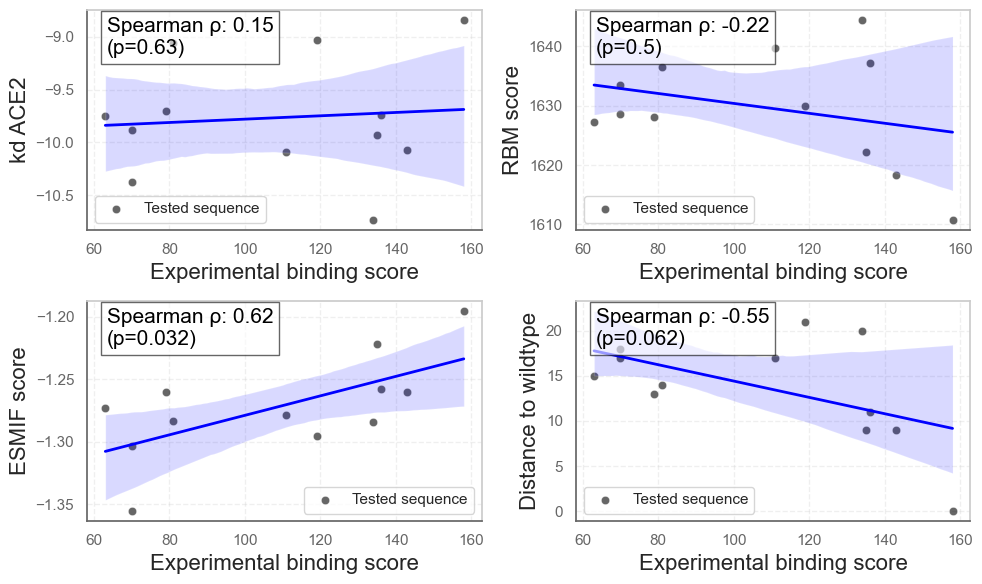

In [9]:
# Replace NaN values in 'ACE-2' with 0
# exp_df['ACE-2'].fillna(0, inplace=True)
#create e copy of exp df where raw is not nan
exp_df_clean = exp_df.copy()
exp_df_clean = exp_df_clean.dropna(subset=['ACE-2'])
# Define variables to compare against ACE-2
comparison_vars = ['ACE-2_model', 'RBM_lll', 'esmif_lll', 'distance_wt']

# Axis label mappings
axis_labels = {
    'ACE-2': 'Experimental binding score',
    'ACE-2_model': 'kd ACE2',
    'RBM_lll': 'RBM score',
    'esmif_lll': 'ESMIF score',
    'distance_wt': 'Distance to wildtype'
}

colors = {
    'scatter': 'black',
    'trend': 'blue'
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, var in enumerate(comparison_vars):
    ax = axes[i]
    
    # Compute Spearman correlation
    spearman_corr, spearman_pval = stats.spearmanr(exp_df_clean['ACE-2'], exp_df_clean[var])
    
    # Scatter plot
    sns.scatterplot(x=exp_df_clean['ACE-2'], y=exp_df_clean[var], ax=ax, alpha=0.6,
                    color=colors['scatter'], label='Tested sequence')
    
    # Regression line
    sns.regplot(x='ACE-2', y=var, data=exp_df_clean, ax=ax,
                scatter=False, color=colors['trend'], line_kws={'linewidth': 2})
    
    # Annotate Spearman correlation
    ax.text(0.05, 0.8, f"Spearman ρ: {spearman_corr:.2f}\n(p={spearman_pval:.2g})",
            transform=ax.transAxes, fontsize=15,
            color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))
    
    # Use mapped axis labels
    ax.set_xlabel(axis_labels['ACE-2'], fontsize=16)
    ax.set_ylabel(axis_labels[var], fontsize=16)
    
    # Styling
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['left'].set_color('#666666')
    ax.spines['bottom'].set_color('#666666')
    ax.tick_params(axis='x', colors='#666666')
    ax.tick_params(axis='y', colors='#666666')

plt.tight_layout()
plt.show()


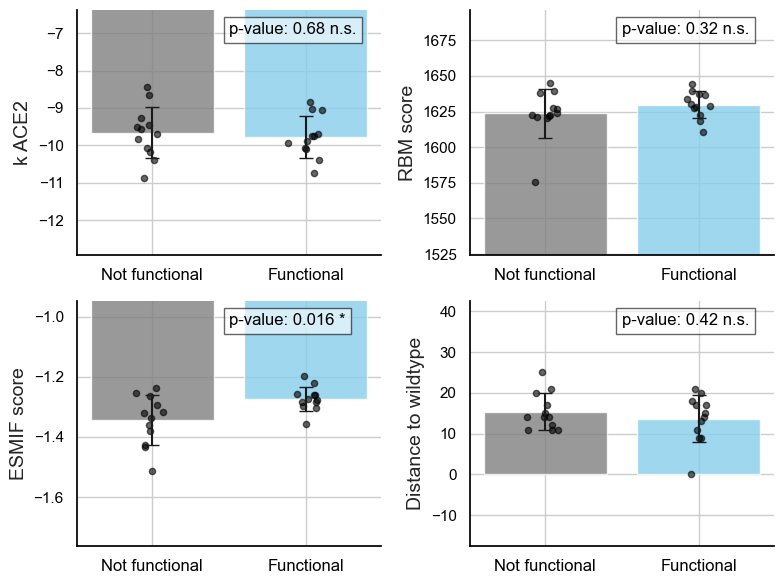

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Variables to compare
comparison_vars = ['ACE-2_model', 'RBM_lll', 'esmif_lll', 'distance_wt']

# Axis label mappings
axis_labels = {
    'ACE-2_model': 'k ACE2',
    'RBM_lll': 'RBM score',
    'esmif_lll': 'ESMIF score',
    'distance_wt': 'Distance to wildtype'
}

# Separate groups: with and without ACE-2 values
with_ace2 = exp_df[~exp_df['ACE-2'].isna()]
without_ace2 = exp_df[exp_df['ACE-2'].isna()]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, var in enumerate(comparison_vars):
    ax = axes[i]

    # Extract values for each group
    values_with = with_ace2[var].dropna()
    values_without = without_ace2[var].dropna()

    # Bar positions and heights
    bar_positions = [0, 1]
    means = [values_without.mean(), values_with.mean()]
    stds = [values_without.std(), values_with.std()]

    # Plot bars with error bars
    ax.bar(bar_positions, means, yerr=stds, capsize=5, color=['gray', 'skyblue'], alpha=0.8)

    # Overlay individual points
    jitter = 0.05
    ax.scatter(np.random.normal(0, jitter, len(values_without)), values_without, color='black', alpha=0.6, s=20)
    ax.scatter(np.random.normal(1, jitter, len(values_with)), values_with, color='black', alpha=0.6, s=20)

    # Labels and formatting
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Not functional', 'Functional'], fontsize=12)
    ax.set_ylabel(axis_labels[var], fontsize=14)
    #y scale from mean-3std to mean+3std
    y_min = min(min(values_with), min(values_without)) - 3 * max(stds)
    y_max = max(max(values_with), max(values_without)) + 3 * max(stds)
    ax.set_ylim(y_min, y_max)
   
    # ax.set_title(axis_labels[var], fontsize=14)

    # Significance test (t-test)
    if len(values_with) > 1 and len(values_without) > 1:
        stat, pval = stats.ttest_ind(values_with, values_without, equal_var=False, nan_policy='omit')
        if pval < 0.001:
            star = '***'
        elif pval < 0.01:
            star = '**'
        elif pval < 0.05:
            star = '*'
        else:
            star = 'n.s.'
      
        ax.text(0.5, 0.9, f'p-value: {pval:.2g} {star}',
                transform=ax.transAxes, fontsize=12,
                color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

    # Styling
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')


plt.tight_layout()
sns.despine()
plt.show()


# Antibody binding

C:\Users\maria\AppData\Local\Temp\ipykernel_40860\707350336.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
C:\Users\maria\AppData\Local\Temp\ipykernel_40860\707350336.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
C:\Users\maria\AppData\Local\Temp\ipykernel_40860\707350336.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
C:\Users\maria\AppData\Local\Temp\ipykernel_40860\707350336.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ign

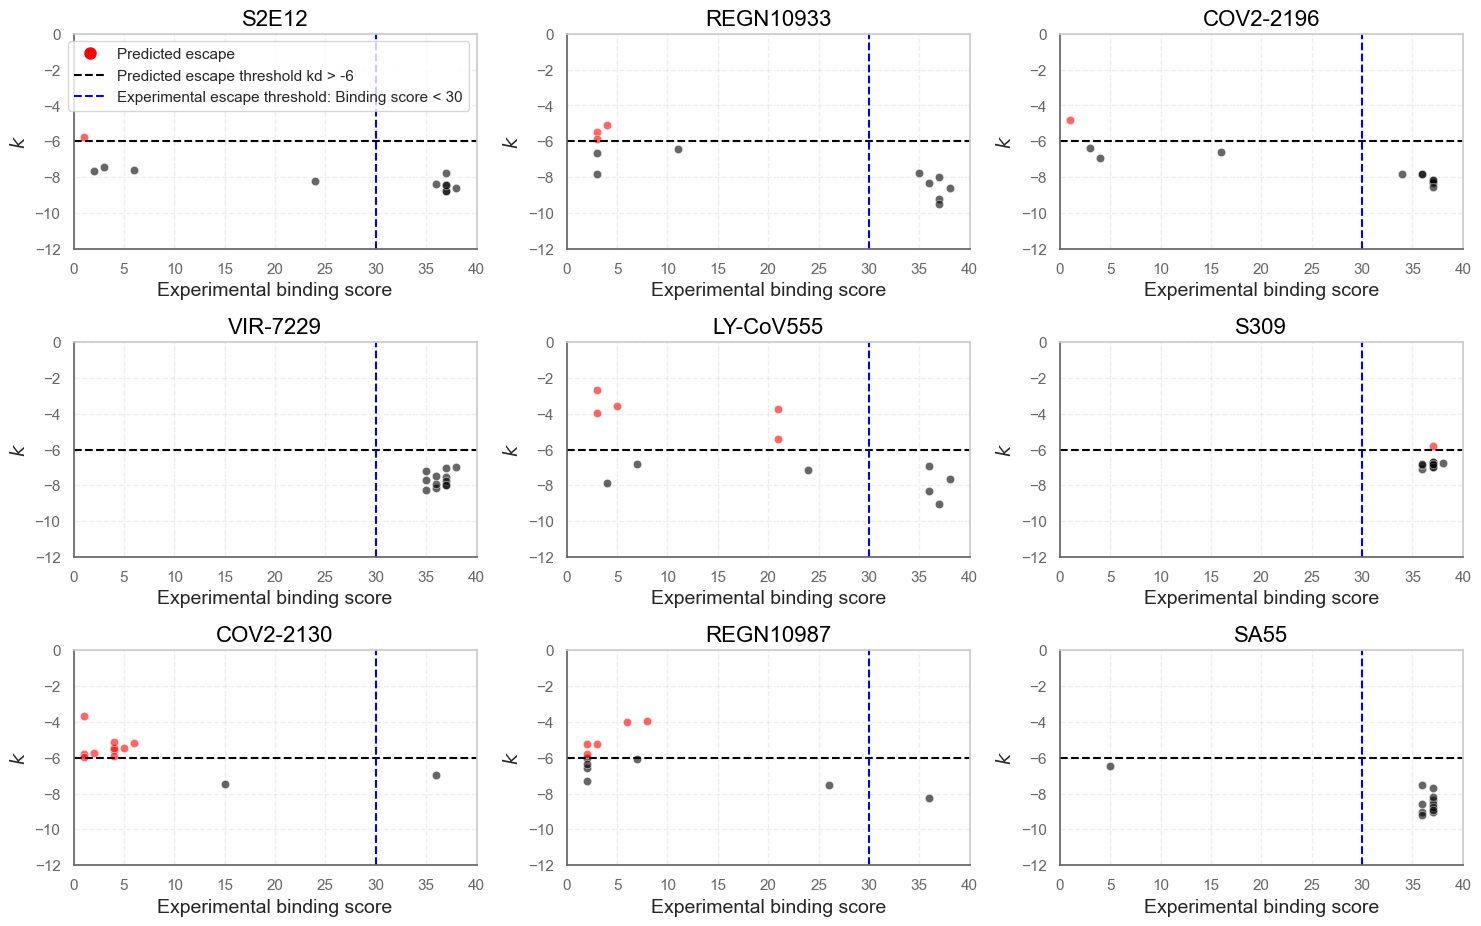

In [11]:
# Define antibody columns and their corresponding model columns
antibody_columns  = [
    'S2E12', 'REGN10933', 'COV2-2196', 'VIR-7229', 'LY-CoV555',
    'S309', 'COV2-2130', 'REGN10987', 'SA55'
]
model_columns = [col + '_model' for col in antibody_columns]
import matplotlib.lines as mlines

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))  # Adjust layout for 11 plots
axes = axes.flatten()

for i, (antibody, model) in enumerate(zip(antibody_columns, model_columns)):
    ax = axes[i]
    
    # Filter out NaN values
    filtered_df = exp_df[~exp_df[antibody].isna()]
    
    # Compute Spearman correlation
    spearman_corr, spearman_pval = stats.spearmanr(filtered_df[antibody], filtered_df[model])
    
    # Separate points based on escape threshold
    above_thresh = filtered_df[filtered_df[model] > -6]
    below_thresh = filtered_df[filtered_df[model] <= -6]
    
    # Plot below-threshold points (default color)
    sns.scatterplot(x=below_thresh[antibody], y=below_thresh[model], ax=ax, alpha=0.6, color=colors['scatter'])

    # Plot above-threshold (escape) points in red
    sns.scatterplot(x=above_thresh[antibody], y=above_thresh[model], ax=ax, alpha=0.6, color='red')

    # Dashed escape threshold line
    ax.axhline(-6, linestyle='--', color='black')
    ax.axvline(30, linestyle='--', color='blue')

    # Annotate Spearman correlation
    # ax.text(0.35, 0.8, f"Spearman ρ: {spearman_corr:.2f}\n(p={spearman_pval:.2g})", transform=ax.transAxes,
    #         fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))
    #title showing spearman
    # ax.set_title(f"Spearman ρ: {spearman_corr:.2f}, p={spearman_pval:.2g}", fontsize=10, color='black')
    ax.set_title(antibody, fontsize=16, color='black')
    # Labels
    ax.set_xlabel('Experimental binding score', fontsize=14)
    ax.set_ylabel(r"$k$", fontsize=14)

    
    # Grid and axis formatting
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['left'].set_color('#666666')
    ax.spines['bottom'].set_color('#666666')
    ax.tick_params(axis='x', colors='#666666')
    ax.tick_params(axis='y', colors='#666666')
    
    # Custom legend only in first subplot
    if i == 0:
        red_point = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Predicted escape')
        dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label='Predicted escape threshold kd > -6')
        dashed_line2 = mlines.Line2D([], [], color='blue', linestyle='--', label='Experimental escape threshold: Binding score < 30')
        #put legend below plot
        ax.legend(handles=[red_point, dashed_line, dashed_line2], loc='upper right', frameon=True)
    else:
        ax.legend().set_visible(False)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Apply common limits
for ax in axes[:len(antibody_columns)]:
    ax.set_ylim(-12, 0)
    ax.set_xlim(0, 40)

plt.tight_layout()
plt.show()


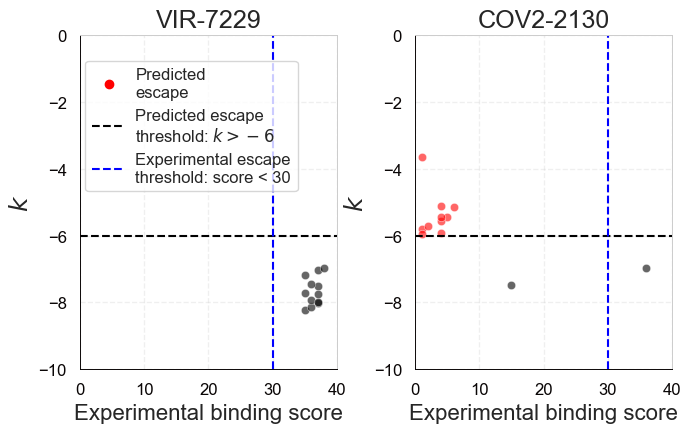

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from scipy import stats

# Define antibody columns and their corresponding model columns
antibody_columns_test  = ['VIR-7229', 'COV2-2130']
model_columns_test = [col + '_model' for col in antibody_columns_test]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8.5, 4.5))
axes = axes.flatten()

for i, (antibody, model) in enumerate(zip(antibody_columns_test, model_columns_test)):
    ax = axes[i]
    
    # Filter out NaN values
    filtered_df = exp_df[~exp_df[antibody].isna()]
    
    # Compute Spearman correlation
    spearman_corr, spearman_pval = stats.spearmanr(filtered_df[antibody], filtered_df[model])
    
    # Separate points based on escape threshold
    above_thresh = filtered_df[filtered_df[model] > -6]
    below_thresh = filtered_df[filtered_df[model] <= -6]
    
    # Plot points
    sns.scatterplot(x=below_thresh[antibody], y=below_thresh[model], ax=ax, alpha=0.6, color='black')
    sns.scatterplot(x=above_thresh[antibody], y=above_thresh[model], ax=ax, alpha=0.6, color='red')

    # Horizontal escape threshold
    ax.axhline(-6, linestyle='--', color='black')
    # Vertical escape threshold
    ax.axvline(30, linestyle='--', color='blue')

    # Title with Spearman correlation
    ax.set_title(antibody, fontsize=18)

    # Axis labels
    ax.set_xlabel("Experimental binding score", fontsize=16)
    ax.set_ylabel(r"$k$", fontsize=18)
    
    # Axis limits and formatting
    ax.set_ylim(-10, 0)
    ax.set_xlim(0, 40)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['left'].set_color("#0A0606")
    ax.spines['bottom'].set_color('#0A0606')
    ax.tick_params(axis='x', colors='#0A0606', labelsize=12)
    ax.tick_params(axis='y', colors='#0A0606', labelsize=12)

    #width of the lines
    ax.spines['left'].set_linewidth(0.7)
    ax.spines['bottom'].set_linewidth(0.7)
    ax.spines['right'].set_linewidth(0.7)
    ax.spines['top'].set_linewidth(0.7)
    
    # # Legend only on first plot
    # if i == 0:
    #     red_point = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=6, label='Predicted escape')
    #     dashed_line = mlines.Line2D([], [], color='black', linestyle='--', label=r'Predicted escape threshold: $k > -6$')
    #     dashed_line2 = mlines.Line2D([], [], color='blue', linestyle='--', label='Experimental escape threshold: Binding score < 30')
    #     #put legend below plot
    #     ax.legend(handles=[red_point, dashed_line, dashed_line2],  frameon=True, fontsize=12, 
    #               loc='upper center', bbox_to_anchor=(0.5, -0.18))
    # else:
    #     ax.legend().set_visible(False)
red_point    = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=6,
                             label='Predicted\nescape')
dashed_line  = mlines.Line2D([], [], color='black', linestyle='--',
                             label='Predicted escape\nthreshold: $k > -6$')
dashed_line2 = mlines.Line2D([], [], color='blue', linestyle='--',
                             label='Experimental escape\nthreshold: score < 30')
fig.legend(
    handles=[red_point, dashed_line, dashed_line2],
    loc='center left',
    bbox_to_anchor=(.1, 0.7),  # just to the right of the second subplot
    ncol=1,
    fontsize=12,
    frameon=True,
    columnspacing=1.0,
    handletextpad=0.6
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # reserve space on the right for the legend
plt.show()


plt.tight_layout()
plt.show()


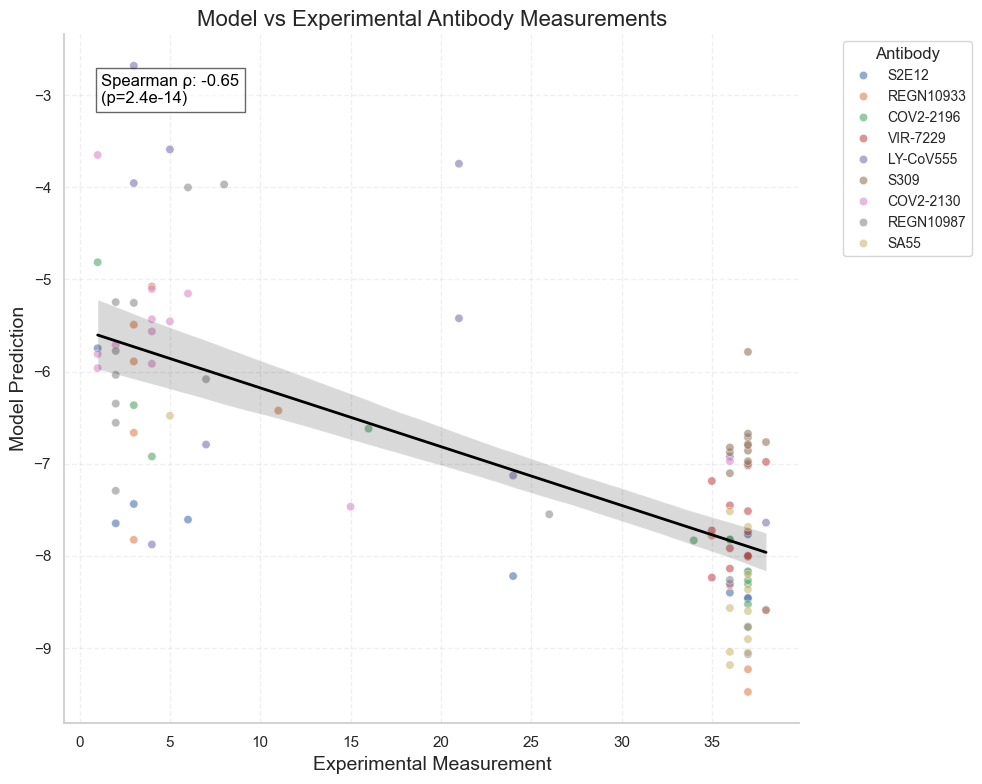

In [13]:
# Prepare data for a combined scatter plot
plot_data = []
# antibody_columns  = [
#     'S2E12', 'REGN10933', 'COV2-2196', 'VIR-7229', 'LY-CoV555',
#     'S309', 'COV2-2130', 'REGN10987', 'SA55'
# ]
# model_columns = [col + '_model' for col in antibody_columns]

# Iterate over antibody columns to gather model vs. experiment data
for antibody, model in zip(antibody_columns, model_columns):
    # if antibody not in  ['SA55', 'S2E12']:
    #     continue
    temp_df = exp_df[[antibody, model]].dropna()  # Drop rows with NaNs
    temp_df.columns = ['Experiment', 'Model']
    temp_df['Antibody'] = antibody  # Add antibody label
    plot_data.append(temp_df)

# Combine all antibody data
combined_df = pd.concat(plot_data, ignore_index=True)

# Compute Spearman correlation for the entire dataset
spearman_corr, spearman_pval = stats.spearmanr(combined_df["Experiment"], combined_df["Model"])

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x="Experiment", y="Model", hue="Antibody", alpha=0.6)

# Plot regression trend line
sns.regplot(data=combined_df, x="Experiment", y="Model", scatter=False, color="black", line_kws={'linewidth': 2})

# Annotate Spearman correlation
plt.text(0.05, 0.9, f"Spearman ρ: {spearman_corr:.2f}\n(p={spearman_pval:.2g})", transform=plt.gca().transAxes,
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

# Customize plot
plt.xlabel("Experimental Measurement", fontsize=14)
plt.ylabel("Model Prediction", fontsize=14)
plt.title("Model vs Experimental Antibody Measurements", fontsize=16)

# Customize grid and spines
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()

# Adjust legend
plt.legend(title="Antibody", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()



In [14]:
combined_df['exp_bin']= np.where(combined_df['Experiment'] < 30, 1, 0)
combined_df['model_bin']= np.where(combined_df['Model'] > -6, 1, 0)
#pritn fpr and tpr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(combined_df['exp_bin'], combined_df['model_bin'])

tpr= cm[1, 1] / (cm[1, 0] + cm[1, 1])  # True Positive Rate
fpr= cm[0, 1] / (cm[0, 0] + cm[0, 1])  # False Positive Rate

print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")



True Positive Rate (TPR): 0.54
False Positive Rate (FPR): 0.02


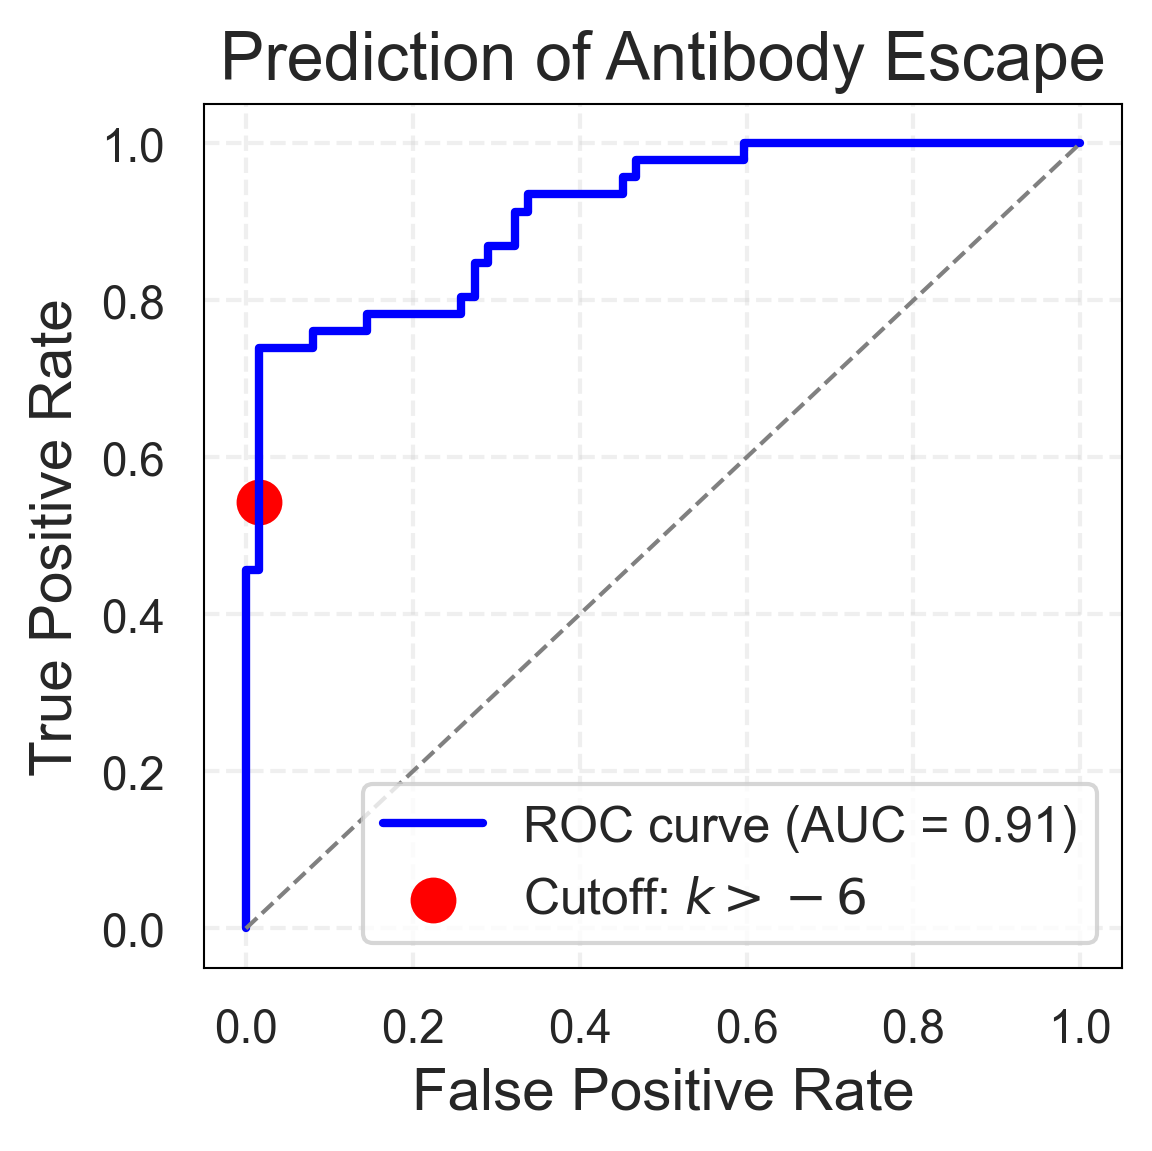

0.016129032258064516 0.5434782608695652


In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define the threshold for classification
threshold = 30

# Prepare data for ROC curve
y_true = (combined_df["Experiment"] < threshold).astype(int)  # Binary labels
y_scores = combined_df["Model"]  # Model predictions as scores

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Get FPR and TPR for cutoff = -6
cutoff = -6
y_pred_cutoff = (y_scores >= cutoff).astype(int)  # Binary predictions at cutoff -6
tp = ((y_pred_cutoff == 1) & (y_true == 1)).sum()
fp = ((y_pred_cutoff == 1) & (y_true == 0)).sum()
fn = ((y_pred_cutoff == 0) & (y_true == 1)).sum()
tn = ((y_pred_cutoff == 0) & (y_true == 0)).sum()

tpr_cutoff = tp / (tp + fn)
fpr_cutoff = fp / (fp + tn)

# Plot ROC curve
fig = plt.figure(figsize=(4, 4), dpi=300)
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1)  # Diagonal baseline

# Highlight the cutoff = -6 point
plt.scatter(fpr_cutoff, tpr_cutoff, color='red', s=100, label=r'Cutoff: $k > -6$')

# Customize plot
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Prediction of Antibody Escape", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
for ax in fig.get_axes():
    for spine in ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(0.5)

# sns styling
plt.tight_layout()
plt.show()
print(fpr_cutoff, tpr_cutoff)


In [16]:
import matplotlib.patches as mpatches
df_log_kd_filtered = exp_df[antibody_columns]

# Step 3: Calculate the correlation matrix for the filtered DataFrame
correlation_matrix_exp = df_log_kd_filtered.cov()
# # Define colors for each class
class_colors = {
    "Class 1": "blue",
    "Class 2": "orange",
    "Class 3": "green",
    "Class 4": "red"
}



# Create a dictionary mapping antibodies to their class color
antibody_color_map = {}
for class_name, antibodies in antibody_classes.items():
    for antibody in antibodies:
        antibody_color_map[antibody] = class_colors[class_name]
correlation_matrix_exp 



,S2E12,REGN10933,COV2-2196,VIR-7229,LY-CoV555,S309,COV2-2130,REGN10987,SA55
S2E12,268.992424,237.174242,245.113636,0.969697,159.992424,0.469697,28.598485,12.803030,-31.363636
REGN10933,237.174242,287.356061,199.840909,0.515152,174.265152,0.196970,49.053030,20.621212,-38.545455
COV2-2196,245.113636,199.840909,236.931818,-0.272727,147.386364,-0.136364,18.204545,23.409091,-26.818182
VIR-7229,0.969697,0.515152,-0.272727,0.969697,-0.121212,0.424242,-2.969697,-6.606061,-1.636364
LY-CoV555,159.992424,174.265152,147.386364,-0.121212,215.356061,-1.984848,45.053030,69.803030,-49.636364
S309,0.469697,0.196970,-0.136364,0.424242,-1.984848,0.333333,-0.924242,-4.151515,-0.363636
COV2-2130,28.598485,49.053030,18.204545,-2.969697,45.053030,-0.924242,98.083333,76.106061,6.090909
REGN10987,12.803030,20.621212,23.409091,-6.606061,69.803030,-4.151515,76.106061,123.060606,3.272727
SA55,-31.363636,-38.545455,-26.818182,-1.636364,-49.636364,-0.363636,6.090909,3.272727,83.636364


In [17]:
df_log_kd_filtered

,S2E12,REGN10933,COV2-2196,VIR-7229,LY-CoV555,S309,COV2-2130,REGN10987,SA55
0,36.0,36.0,36.0,35.0,36.0,36.0,36.0,36.0,36.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,3.0,3.0,35.0,4.0,36.0,1.0,2.0,36.0
5,6.0,3.0,16.0,35.0,24.0,36.0,2.0,26.0,36.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,3.0,1.0,37.0,3.0,38.0,15.0,2.0,36.0
8,37.0,37.0,37.0,37.0,38.0,37.0,5.0,3.0,37.0
9,37.0,37.0,36.0,36.0,7.0,37.0,4.0,2.0,37.0


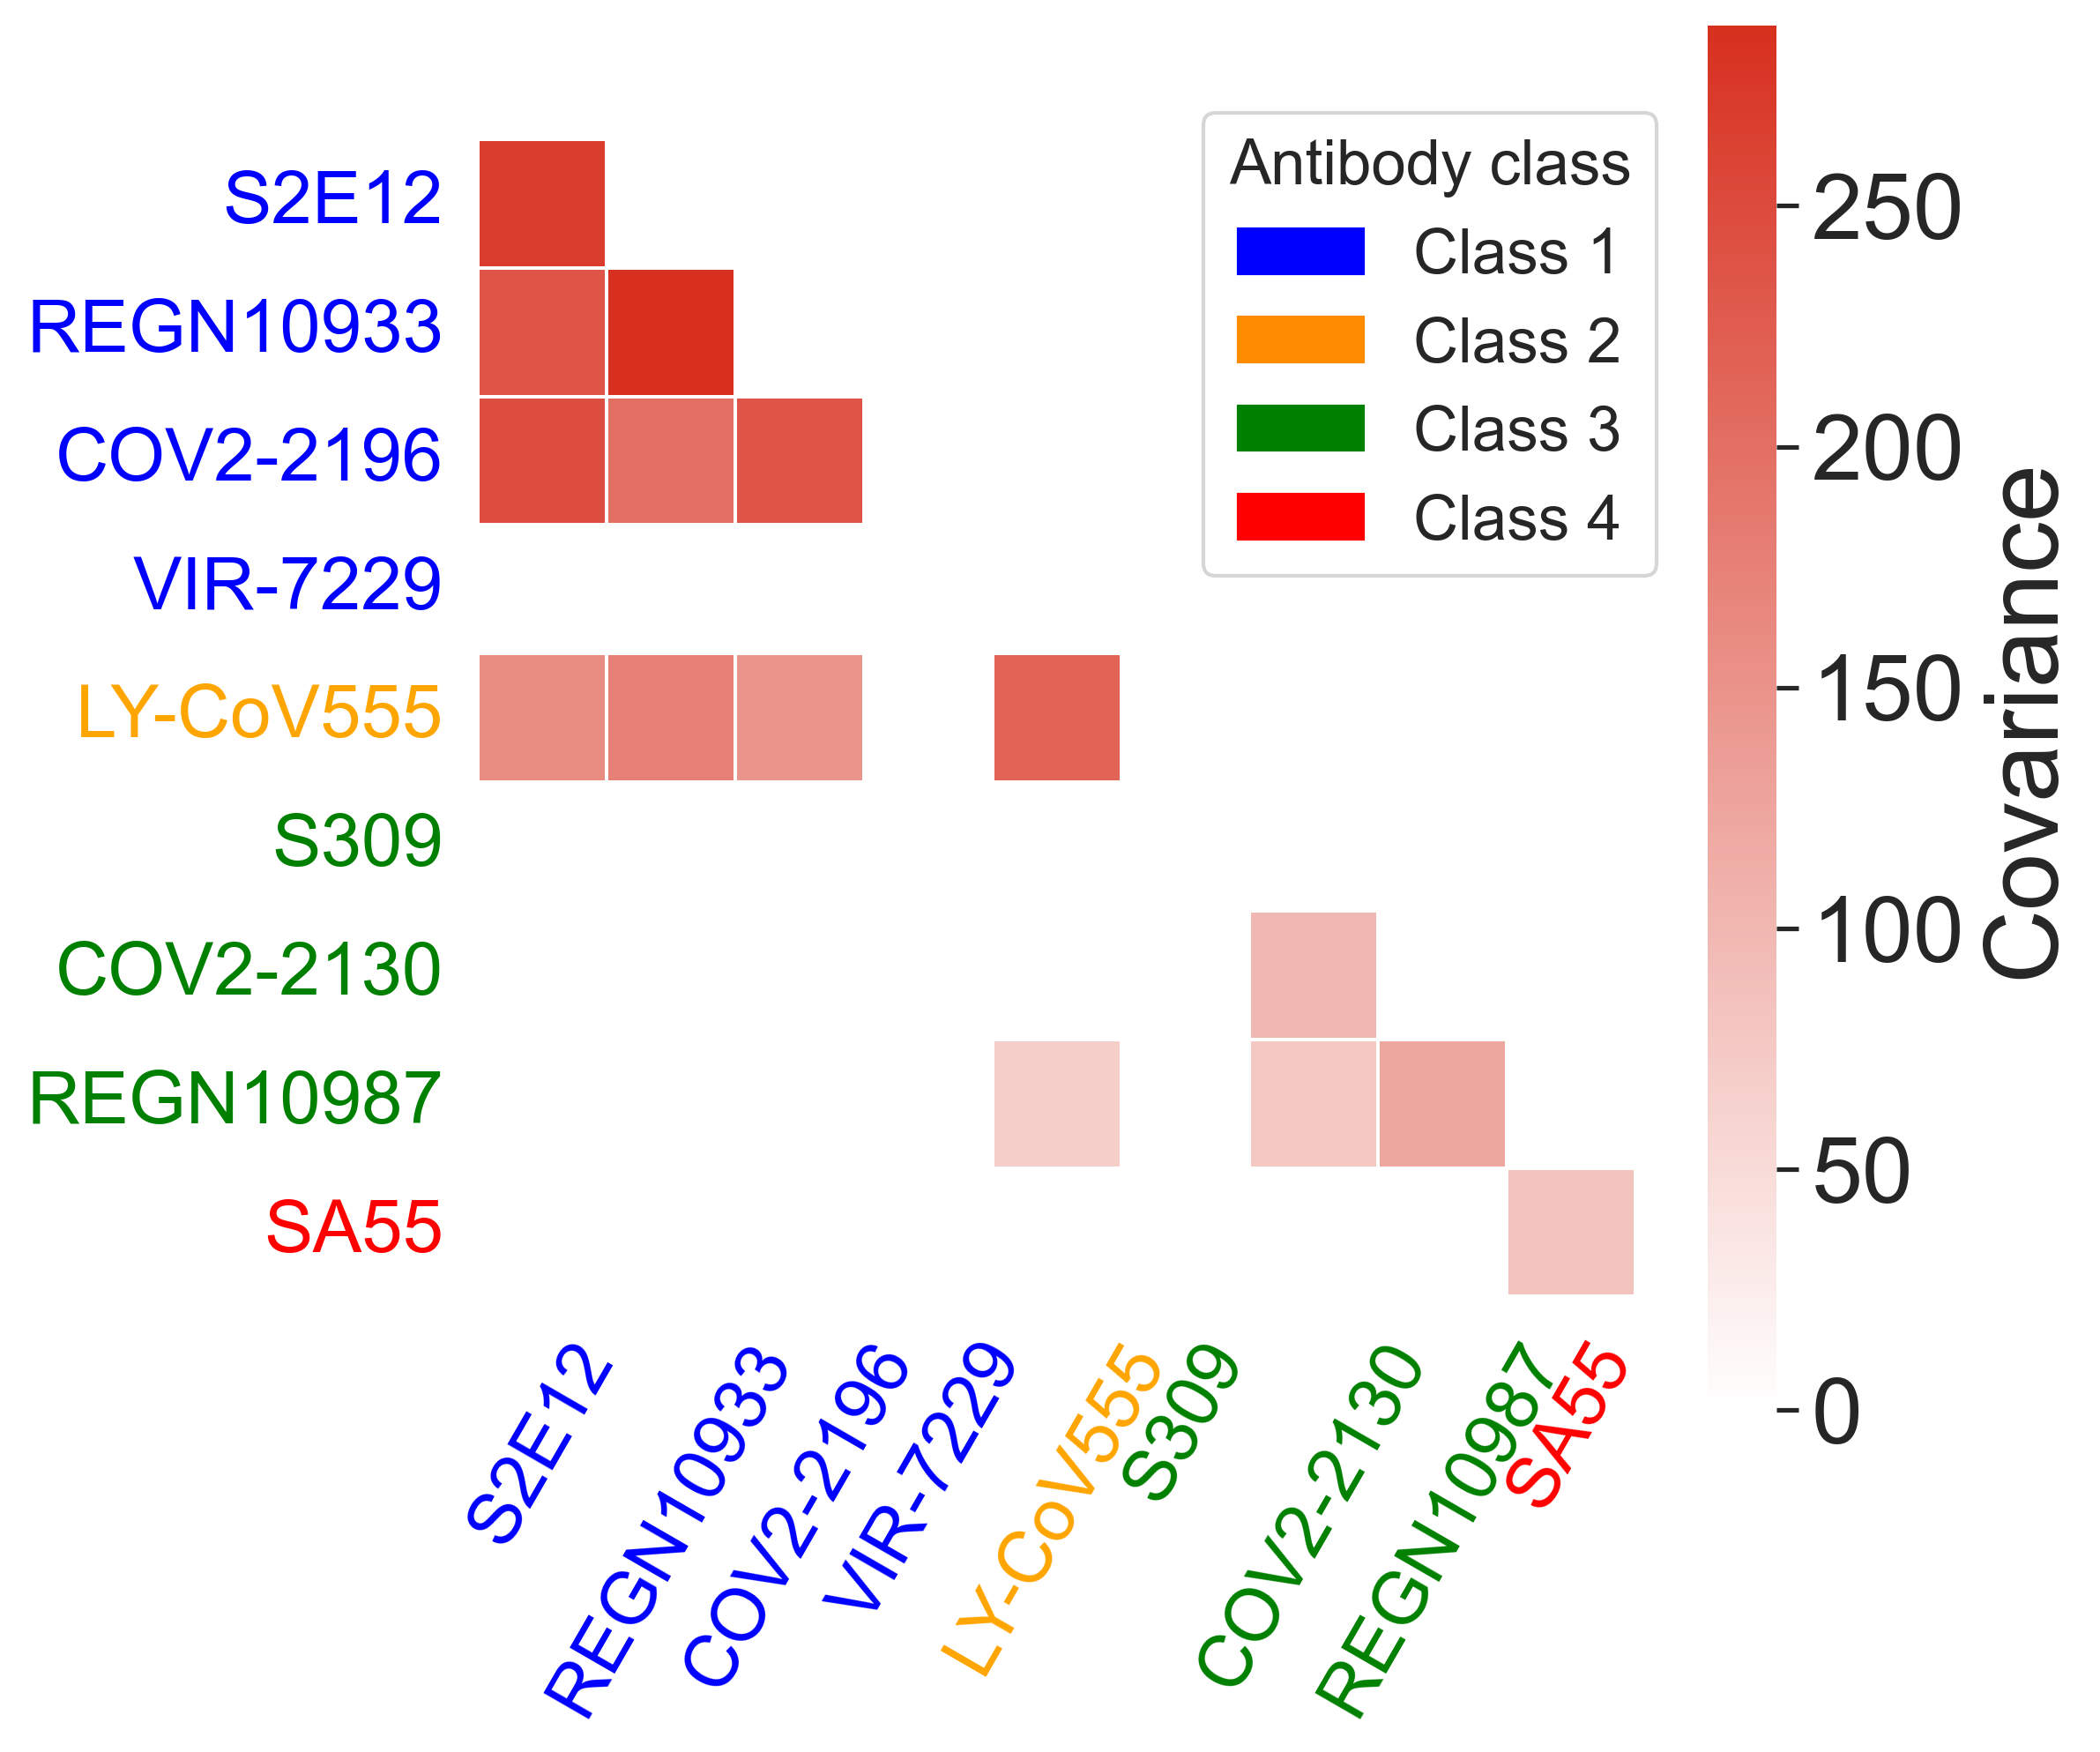

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# --------------------------------------------------
# 1) Compute & threshold the covariance matrix
# --------------------------------------------------
cov = df_log_kd_filtered.cov()

# Zero-out small magnitudes so they appear white
cov[np.abs(cov) < 50] = 0

# Mask: hide the UPPER triangle, keep diagonal & lower triangle
mask = np.triu(np.ones_like(cov, dtype=bool), k=1)

# White → Red colormap (pure white at 0)
white_red = LinearSegmentedColormap.from_list("white_red", ["#FFFFFF", "#D7301F"])

# Choose vmax after thresholding so the scale fits the data
vmax = np.nanmax(cov.values)
vmin = 0.0  # per your request

# --------------------------------------------------
# 2) Plot
# --------------------------------------------------
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(8, 7), dpi=300)

heatmap = sns.heatmap(
    cov,
    mask=mask,
    cmap=white_red,
    vmin=vmin, vmax=vmax,
    annot=False,
    linewidths=0.5,
    square=True
)

# --------------------------------------------------
# 3) Cosmetic tweaks
# --------------------------------------------------
# Color tick labels by antibody class
for label in ax.get_xticklabels():
    label.set_color(antibody_color_map[label.get_text()])
    label.set_fontsize(20)
    label.set_rotation(60)

for label in ax.get_yticklabels():
    label.set_color(antibody_color_map[label.get_text()])
    label.set_fontsize(20)
    label.set_rotation(0)

# Colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Covariance', fontsize=28)
cbar.ax.tick_params(labelsize=25)

plt.tight_layout()

# Legend for antibody classes
class_colors = {
    'Class 1': 'blue',
    'Class 2': 'darkorange',
    'Class 3': 'green',
    'Class 4': 'red'
}
legend_patches = [mpatches.Patch(color=color, label=cls) for cls, color in class_colors.items()]
plt.legend(
    handles=legend_patches,
    title="Antibody class",
    bbox_to_anchor=(0.6, 1.05),
    loc='upper left',
    fontsize=17,
    title_fontsize=17
)

plt.show()


In [19]:
upper_indices = np.triu_indices_from(correlation_matrix_exp, k=1)

# Convert to a 1D array
upper_diagonal_values_exp = correlation_matrix_exp.values[upper_indices]
# Display the extracted values
upper_diagonal_values_exp

array([ 2.37174242e+02,  2.45113636e+02,  9.69696970e-01,  1.59992424e+02,
        4.69696970e-01,  2.85984848e+01,  1.28030303e+01, -3.13636364e+01,
        1.99840909e+02,  5.15151515e-01,  1.74265152e+02,  1.96969697e-01,
        4.90530303e+01,  2.06212121e+01, -3.85454545e+01, -2.72727273e-01,
        1.47386364e+02, -1.36363636e-01,  1.82045455e+01,  2.34090909e+01,
       -2.68181818e+01, -1.21212121e-01,  4.24242424e-01, -2.96969697e+00,
       -6.60606061e+00, -1.63636364e+00, -1.98484848e+00,  4.50530303e+01,
        6.98030303e+01, -4.96363636e+01, -9.24242424e-01, -4.15151515e+00,
       -3.63636364e-01,  7.61060606e+01,  6.09090909e+00,  3.27272727e+00])

In [20]:
# SEQ=np.load('model_testing/generated_sequences_ace2tensor(-9.3000)_betatensor(-0.4463).npy')
MERGED_KD_VECTORS = KD_VECTORS | NEW_KD_VECTORS

SEQ=np.load('../Figure 4 (Generative)/generated_sequences_ace2tensor(-9.3000)_betatensor(-0.4463).npy')

# antibody_columns  = [
#     'S2E12', 'REGN10933', 'COV2-2196', 'VIR-7229', 'LY-CoV555',
#     'S309', 'COV2-2130', 'REGN10987', 'SA55'
# ]

def first_logkd(generated_sequences, ab_index, kd_vec):
    """
    Output: log10(Kd) of generated sequences for the antibody at index ab_index in kd_vec
    """
    out = np.log10(
        np.array([get_Kd(s, kd_vec)[ab_index] for s in generated_sequences])
    )
    # -15 if <-15 or inf
    out[out < -15] = -15
    # out[out == -np.inf] = -15
    # out[out == np.inf] = -15

    return out
ab_names=list(MERGED_KD_VECTORS.keys())
indexes_ab = [ab_names.index(name) for name in antibody_columns]
kd_theory_mat=[]
for i in indexes_ab:
    kd_hugo=first_logkd(SEQ,i,MERGED_KD_VECTORS)
    kd_theory_mat.append(kd_hugo)
kd_theory_mat=np.array(kd_theory_mat).transpose()
kd_theory_df = pd.DataFrame(kd_theory_mat, columns=antibody_columns)
kd_theory_mat.shape


(1000, 9)

In [21]:
import matplotlib.patches as mpatches
df_log_kd_filtered = kd_theory_df[antibody_columns]

# Step 3: Calculate the correlation matrix for the filtered DataFrame
correlation_matrix_theory = df_log_kd_filtered.cov()
# Define colors for each class
class_colors = {
    "Class 1": "blue",
    "Class 2": "orange",
    "Class 3": "green",
    "Class 4": "red"
}

antibody_classes = {
    "Class 1": ["S2E12", "REGN10933", "COV2-2196", "C0V2-3194", "VIR-7229"],
    "Class 2": ["LY-CoV555"],
    "Class 3": ["S309", "REGN10987",'COV2-2130', 'LyCoV1404'],
    "Class 4": ["SA55"]
}

# Create a dictionary mapping antibodies to their class color
antibody_color_map = {}
for class_name, antibodies in antibody_classes.items():
    for antibody in antibodies:
        antibody_color_map[antibody] = class_colors[class_name]

upper_indices = np.triu_indices_from(correlation_matrix_theory, k=1)

# Convert to a 1D array
upper_diagonal_values_theory = correlation_matrix_theory.values[upper_indices]

# Display the extracted values
upper_diagonal_values_theory

array([ 1.03245266,  0.74108994,  0.02840039,  0.82915618, -0.00705037,
       -0.04321413, -0.22645749, -0.1217801 ,  1.19877616,  0.0751321 ,
        1.36973074, -0.05039307,  0.08582229, -0.47511048, -0.15947109,
        0.05038546,  0.69331311,  0.0048963 , -0.09756025, -0.17523423,
       -0.09097767,  0.11027532, -0.00563959, -0.02569029, -0.19874697,
        0.05839691, -0.04427057,  0.061871  , -1.29944825, -0.21932629,
       -0.03668839, -0.06484859, -0.05111199,  1.02567323,  0.0327534 ,
       -0.10113542])

C:\Users\maria\AppData\Local\Temp\ipykernel_40860\523023781.py:36: RuntimeWarning: divide by zero encountered in scalar remainder
  ax.annotate(f"{pair[0]} - {pair[1]}", xy=(x-100, y-0.01*(2%idx)), xytext=(5, 5), textcoords="offset points",


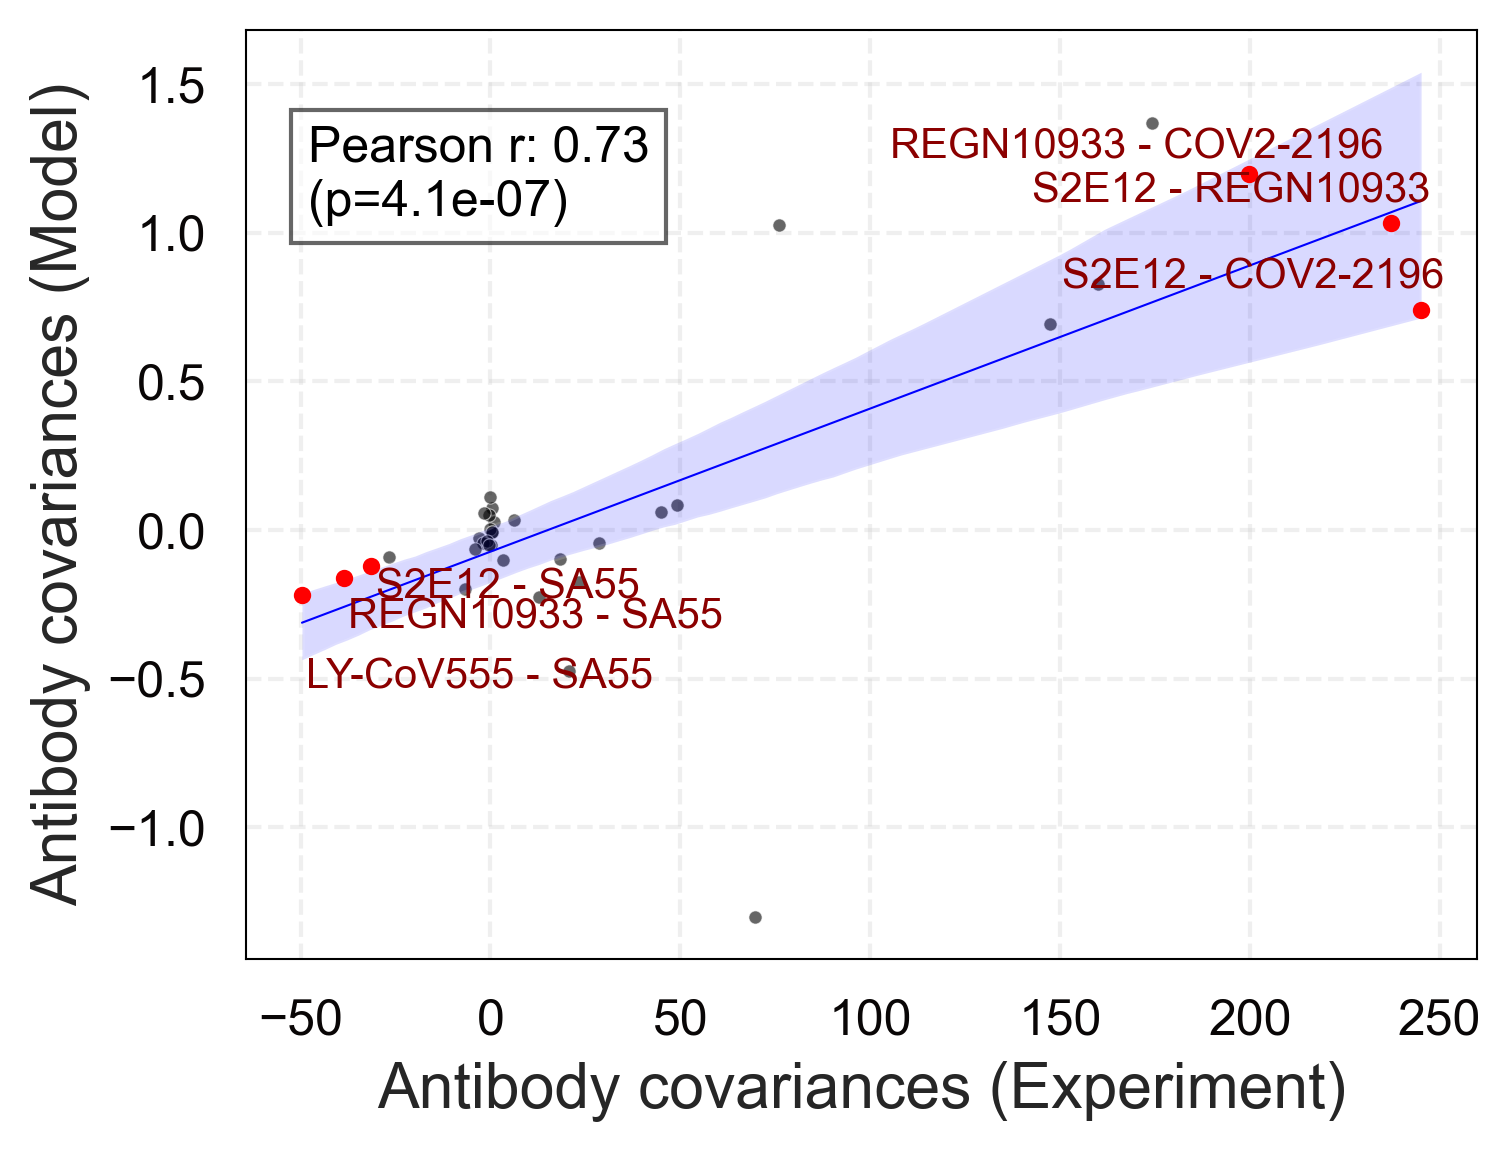

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.lines as mlines

# Reconstruct antibody pairs from upper triangle indices
antibody_list = df_log_kd_filtered.columns.tolist()
antibody_pairs = [(antibody_list[i], antibody_list[j]) for i, j in zip(*np.triu_indices(len(antibody_list), k=1))]

# Compute Pearson correlation
pearson_corr, pearson_pval = stats.pearsonr(upper_diagonal_values_theory, upper_diagonal_values_exp)

# Prepare figure

fig, ax = plt.subplots(figsize=(5.2, 4.), dpi=300)

# Scatter plot of correlations
sns.scatterplot(x=upper_diagonal_values_exp, y=upper_diagonal_values_theory, ax=ax, alpha=0.6, color="black", s=10)

# Regression line
sns.regplot(x=upper_diagonal_values_exp, y=upper_diagonal_values_theory, ax=ax, scatter=False, color="blue", line_kws={'linewidth': 0.5})

# Annotate Pearson correlation on plot
ax.text(0.05, 0.8, f"Pearson r: {pearson_corr:.2f}\n(p={pearson_pval:.2g})", transform=ax.transAxes,
        fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

# Label the top 5 experimental correlation points
top_indices = np.argsort(upper_diagonal_values_exp)[-3:]  # top 5 highest experimental correlations
#add bottom 5
bottom_indices = np.argsort(upper_diagonal_values_exp)[:3]  # bottom 5 lowest experimental correlations
for idx in top_indices:
    pair = antibody_pairs[idx]
    x = upper_diagonal_values_exp[idx]
    y = upper_diagonal_values_theory[idx]
    ax.annotate(f"{pair[0]} - {pair[1]}", xy=(x-100, y-0.01*(2%idx)), xytext=(5, 5), textcoords="offset points",
                fontsize=10, color='darkred')
    ax.scatter(x, y, color='red', s=10, edgecolor='red')
# Annotate the bottom 5 experimental correlation points

for idx in bottom_indices:
    pair = antibody_pairs[idx]
    x = upper_diagonal_values_exp[idx]
    y = upper_diagonal_values_theory[idx]

    ax.annotate(f"{pair[0]} - {pair[1]}", xy=(x, y), xytext=(1, -3-(idx/1.5)), textcoords="offset points",
                fontsize=10, color='darkred')
    ax.scatter(x, y, color='red', s=10, edgecolor='red')

# Axis labels
ax.set_ylabel("Antibody covariances (Model)", fontsize=15)
ax.set_xlabel("Antibody covariances (Experiment)", fontsize=15)

# Style plot
ax.grid(True, linestyle='--', alpha=0.3)
ax.spines['left'].set_color("#090606")
ax.spines['bottom'].set_color("#090606")
ax.tick_params(axis='x', colors='#090606', labelsize=12)
ax.tick_params(axis='y', colors='#090606', labelsize=12)
for ax in fig.get_axes():
    for spine in ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(0.5)

plt.tight_layout()
plt.show()


# Percent escape

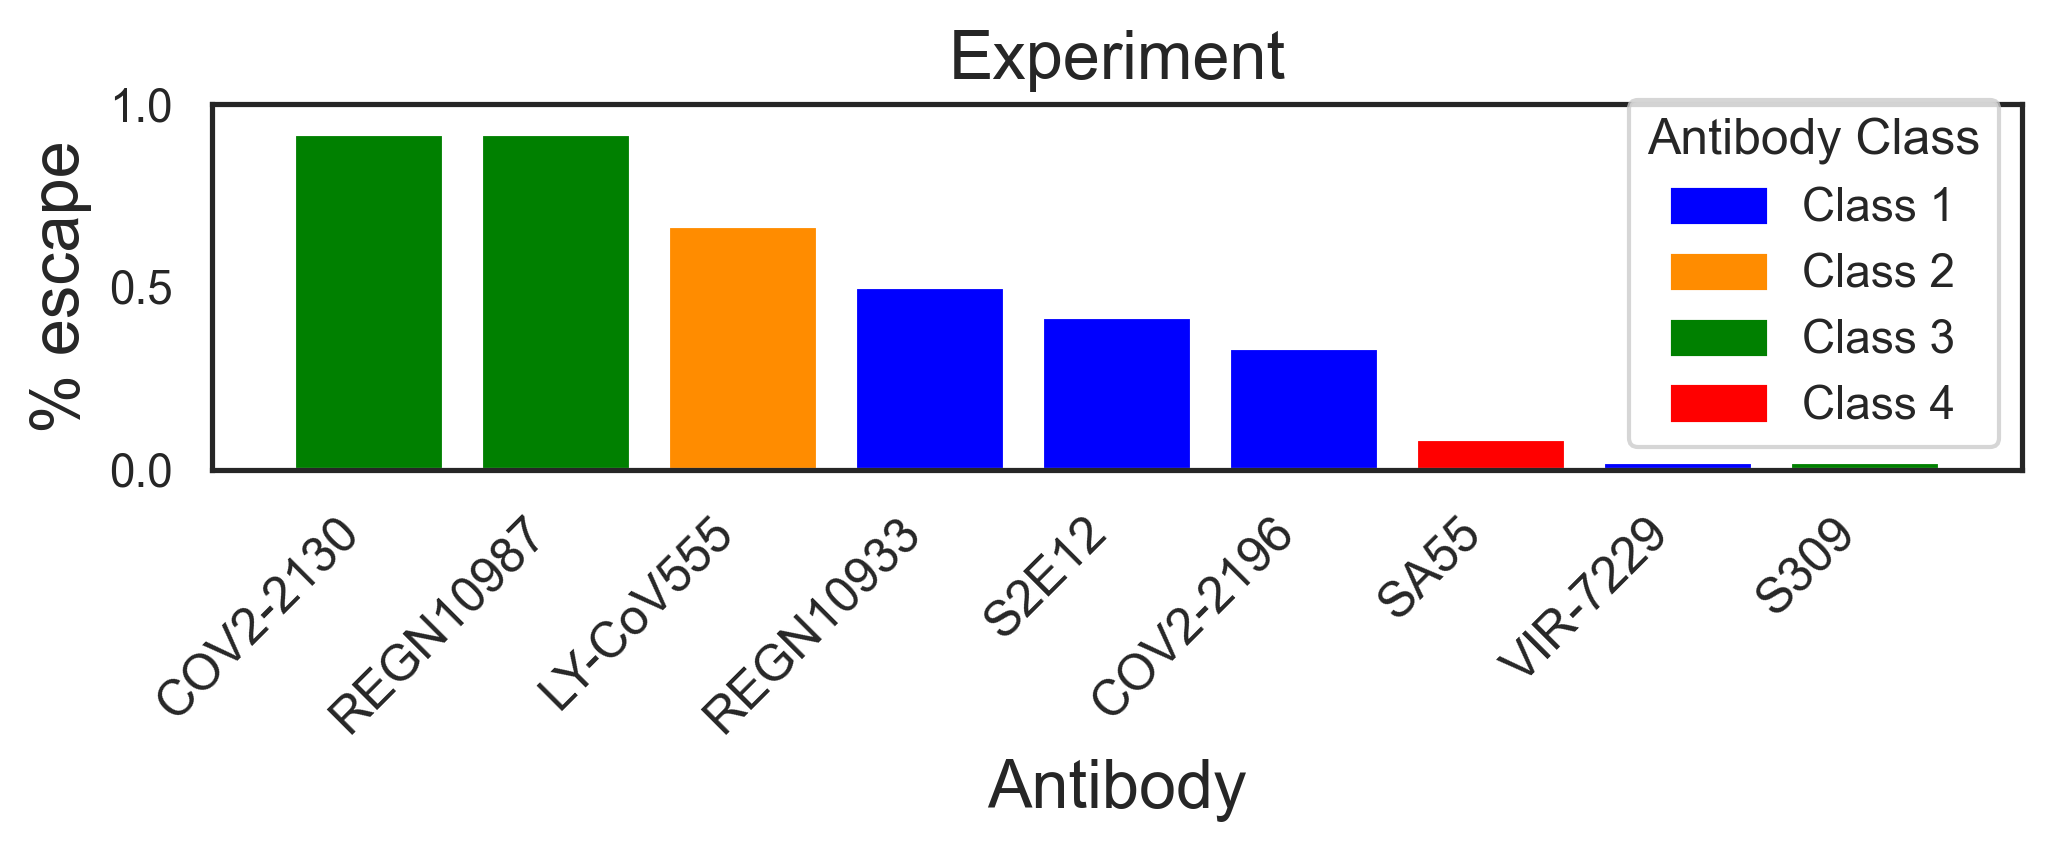

In [23]:
# List of antibody columns
antibody_columns = [
     'S2E12', 'REGN10933', 'COV2-2196', 'VIR-7229', 'LY-CoV555',
    'S309', 'COV2-2130', 'REGN10987', 'SA55'
]

# Count the number of rows where values are below 30 for each antibody
below_30_counts = {antibody: (exp_df[antibody] < 30).sum()/(exp_df[antibody] < 50).sum() for antibody in antibody_columns}

# Convert to sorted lists for plotting
antibodies_sorted, counts_sorted = zip(*sorted(below_30_counts.items(), key=lambda x: x[1], reverse=True))

# Define class colors
class_colors = {
    "Class 1": "blue",
    "Class 2": "darkorange",
    "Class 3": "green",
    "Class 4": "red"
}

# Define antibody classes
antibody_classes = {
    "Class 1": ["S2E12", "REGN10933", "COV2-2196", "C0V2-3194", "VIR-7229"],
    "Class 2": ["LY-CoV555"],
    "Class 3": ["S309", "REGN10987", "COV2-2130", "LyCoV1404"],
    "Class 4": ["SA55"]
}

# Map each antibody to its respective class color
antibody_to_color = {}
for class_name, antibodies in antibody_classes.items():
    for antibody in antibodies:
        if antibody in antibody_columns:
            antibody_to_color[antibody] = class_colors[class_name]

# Get colors corresponding to sorted antibodies
bar_colors = [antibody_to_color.get(antibody, "gray") for antibody in antibodies_sorted]

min_bar_height = 0.02  # Adjust as needed
# Adjust counts to ensure small values are visible
counts_sorted = [max(value, min_bar_height) for value in counts_sorted]

# Create bar plot with colors
plt.figure(figsize=(7, 3), dpi=300)
plt.bar(antibodies_sorted, counts_sorted, color=bar_colors)

# Labels and title
plt.xlabel("Antibody", fontsize=16)
plt.ylabel("% escape", fontsize=16)
plt.title("Experiment", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)
legend_patches = [plt.Rectangle((0,0),1,1, color=color, label=class_name) for class_name, color in class_colors.items()]
plt.legend(handles=legend_patches, title="Antibody Class", loc="best")
# Show plot
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


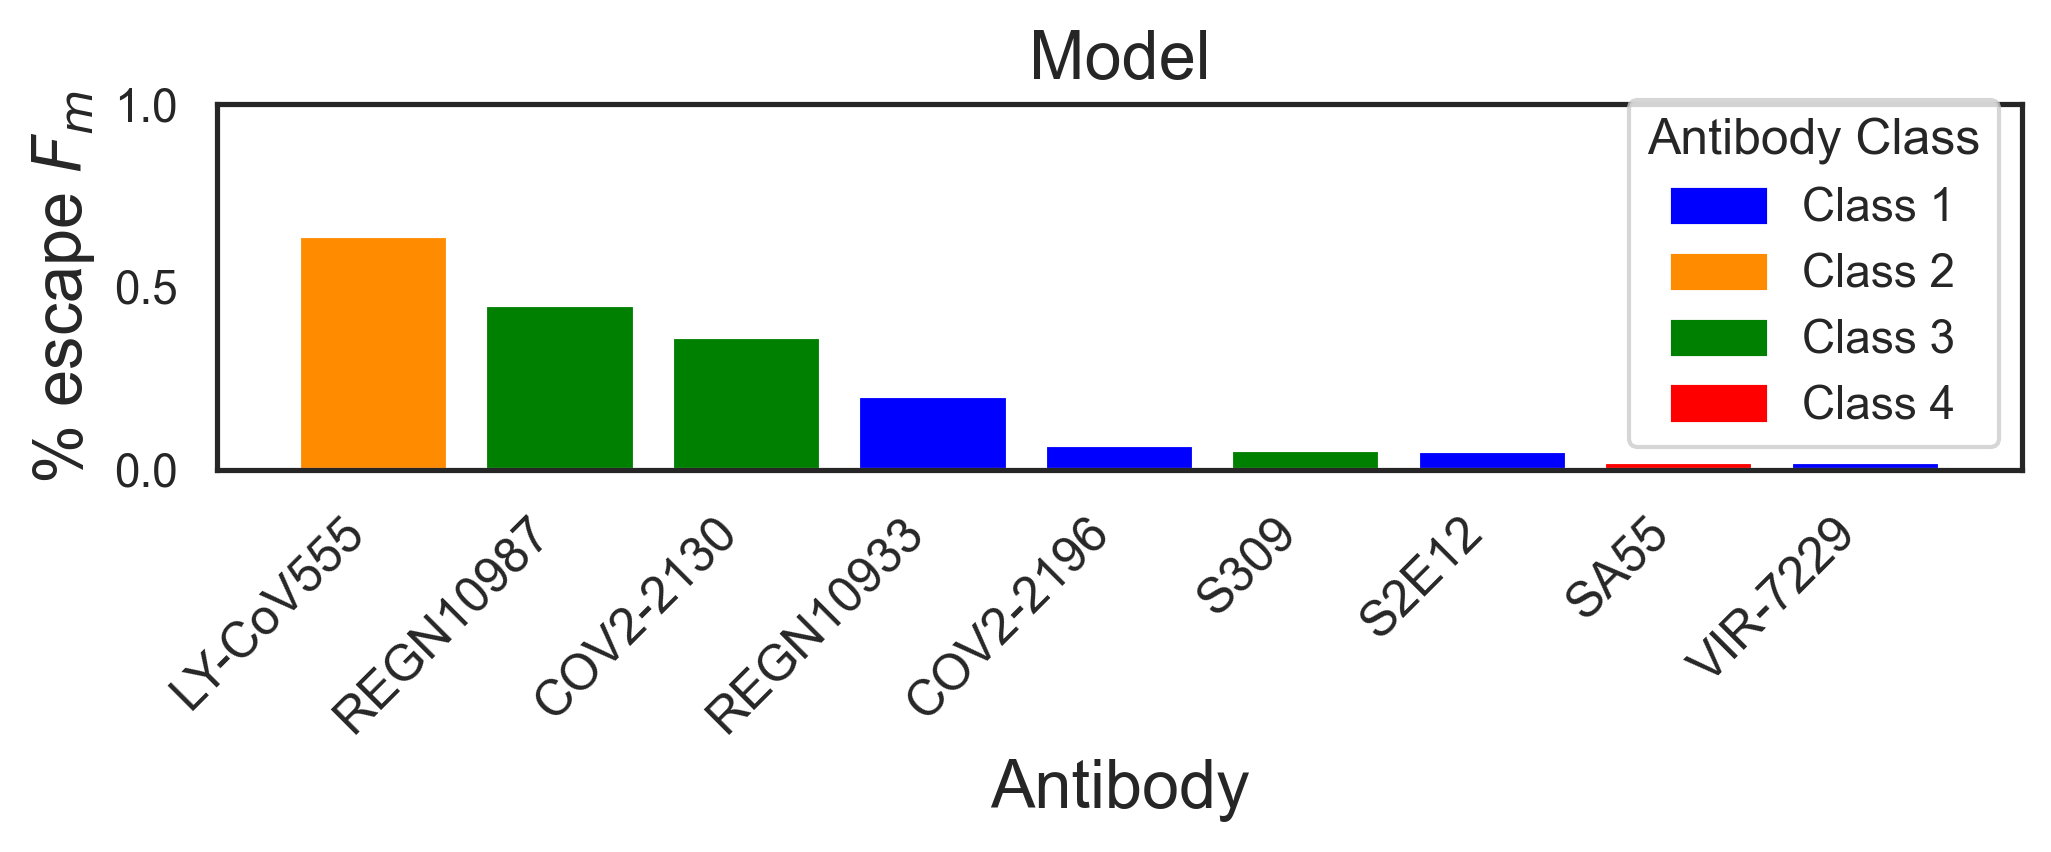

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load per-antibody dataset with Fm and Fm_uni
df_all_percent = pd.read_csv("../Figure 4 (generative)/fm_per_antibody.csv")

# Your original code used 10**Fm
df_all_percent["percentage"] = df_all_percent["Fm"]

# Normalize class labels from dataset to match legend keys: "Class 1", ...
def _norm_class(c):
    if pd.isna(c):
        return "Unclassified"
    s = str(c).strip().lower().replace("-", " ").replace("_", " ")
    # map common variants like "class1", "class 1", "Class 1", etc.
    if s.startswith("class"):
        # extract first integer if present
        import re
        m = re.search(r"(\d+)", s)
        if m:
            return f"Class {int(m.group(1))}"
        return "Unclassified"
    return s.title()  # e.g., "Unclassified"

df_all_percent["Class_norm"] = df_all_percent["Class"].apply(_norm_class)

# Build a lookup from antibody -> (percentage, class)
ab_to_row = {
    r["antibody"]: (r["percentage"], r["Class_norm"])
    for _, r in df_all_percent.iterrows()
}

# --- Build percent_array in the same order as antibody_columns
percent_array = []
for antibody in antibody_columns:
    if antibody not in ab_to_row:
        raise KeyError(f"Antibody '{antibody}' not found in fm_per_antibody.csv")
    percent_array.append(ab_to_row[antibody][0])
percent_array = np.array(percent_array)

# --- Sort results (descending) for visualization
sorted_indices = np.argsort(-percent_array)
antibodies_sorted = [antibody_columns[i] for i in sorted_indices]
counts_sorted = percent_array[sorted_indices]

# Ensure tiny bars are visible
min_bar_height = 0.02
counts_sorted = [max(v, min_bar_height) for v in counts_sorted]

# --- Colors: keep your palette; map from dataset classes
class_colors = {
    "Class 1": "blue",
    "Class 2": "darkorange",
    "Class 3": "green",
    "Class 4": "red",
    "Unclassified": "gray",
}

antibody_to_color = {}
for ab in antibodies_sorted:
    cls = ab_to_row[ab][1]
    antibody_to_color[ab] = class_colors.get(cls, "gray")
bar_colors = [antibody_to_color[ab] for ab in antibodies_sorted]

# --- Plot (same styling as before)
plt.figure(figsize=(7, 3), dpi=300)
plt.bar(antibodies_sorted, counts_sorted, color=bar_colors)

plt.xlabel("Antibody", fontsize=16)
plt.ylabel(r"% escape $F_m$", fontsize=16)
plt.title("Model", fontsize=16)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylim(0, 1.0)

# Legend from the colors actually present
present_classes = sorted({ab_to_row[ab][1] for ab in antibodies_sorted})
legend_patches = [
    plt.Rectangle((0, 0), 1, 1, color=class_colors[c], label=c)
    for c in present_classes if c in class_colors
]
plt.legend(handles=legend_patches, title="Antibody Class", loc="best")

plt.tight_layout()
plt.show()


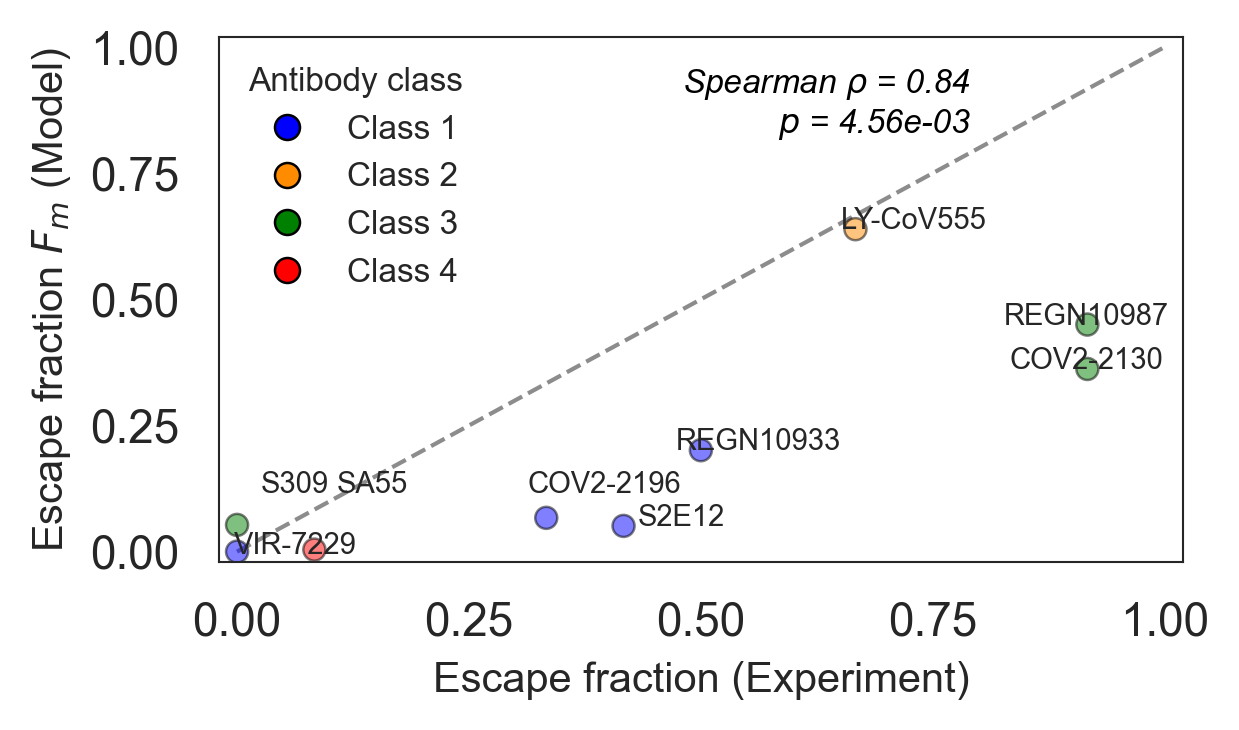

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# -----------------------------
# Inputs expected:
# - exp_df: dataframe with experimental IC50 columns per antibody (same names as in antibody_columns)
# - df_all_percent: dataframe with columns ["antibody", "Fm", "Class"] where Fm is model escape fraction in [0,1]
# - antibody_columns: list of antibodies to compare (from your snippet)
# -----------------------------

# --- 1) Experiment metric: escape fraction per antibody
#     You defined it as (# < 30) / (# < 50)
exp_escape = {}
for ab in antibody_columns:
    if ab not in exp_df.columns:
        raise KeyError(f"Experimental column '{ab}' not found in exp_df")
    num_lt_30 = (exp_df[ab] <= 30).sum()
    num_lt_all = (exp_df[ab] >= 0).sum()

    exp_escape[ab] = num_lt_30/num_lt_all

# --- 2) Model metric: Fm per antibody (already a fraction ∈ [0,1])
def _norm_class(c):
    if pd.isna(c): return "Unclassified"
    s = str(c).strip().lower().replace("-", " ").replace("_", " ")
    if s.startswith("class"):
        import re
        m = re.search(r"(\d+)", s)
        if m: return f"Class {int(m.group(1))}"
        return "Unclassified"
    return s.title()

df_all_percent["Class_norm"] = df_all_percent["Class"].apply(_norm_class)

# Make a lookup
ab_to_model = dict(zip(df_all_percent["antibody"], df_all_percent["Fm"]))
ab_to_class = dict(zip(df_all_percent["antibody"], df_all_percent["Class_norm"]))

# --- 3) Align arrays in the exact order of antibody_columns and filter missing
ab_order, x_exp, y_model, classes = [], [], [], []
for ab in antibody_columns:
    if (ab in exp_escape) and (ab in ab_to_model):
        ex = exp_escape[ab]
        mo = ab_to_model[ab]
        if pd.notna(ex) and pd.notna(mo):
            ab_order.append(ab)
            x_exp.append(float(ex))
            y_model.append(float(mo))
            classes.append(ab_to_class.get(ab, "Unclassified"))

x_exp = np.array(x_exp)
y_model = np.array(y_model)

# --- 4) Colors (match your palette)
class_colors = {
    "Class 1": "blue",
    "Class 2": "darkorange",
    "Class 3": "green",
    "Class 4": "red",
    "Unclassified": "gray",
}
point_colors = [class_colors.get(c, "gray") for c in classes]

# --- 5) Plot: Nature-ready scatter
plt.rcParams.update({
    "font.size": 9,
    "axes.linewidth": 0.5,
    "xtick.major.width": 1.0,
    "ytick.major.width": 1.0,
    "xtick.direction": "out",
    "ytick.direction": "out",
})

fig, ax = plt.subplots(figsize=(4.2, 2.5), dpi=300)  # ~one-column figure

# Range: clamp to [0,1] with slight margins
pad = 0.02
minv, maxv = 0 - pad, 1 + pad
ax.set_xlim(minv, maxv)
ax.set_ylim(minv, maxv)

# y = x reference
ax.plot([0, 1], [0, 1], lw=1.0, ls="--", color="k", alpha=0.5, zorder=1)

# Points
ax.scatter(
    x_exp, y_model,
    s=28,           # marker size
    c=point_colors,
    edgecolors="black",
    linewidths=0.6,
    zorder=2, alpha=0.5
)

# Labels (small, slightly offset to reduce overlap)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
xrange, yrange = xlim[1] - xlim[0], ylim[1] - ylim[0]

for idx,(xi, yi, ab) in enumerate(zip(x_exp, y_model, ab_order)):
    # Dynamic offsets: away from diagonal and within frame
    dx = 0.06 * xrange if xi < 0.9 * xlim[1] else -0.03 * xrange
    dy = (0.015 if yi < xi else -0.02) * yrange

    # Compute new coordinates
    xtext = xi + dx
    ytext = yi + dy

    # Keep text inside the axes bounds
    xtext = min(max(xtext, xlim[0] + 0.01 * xrange), xlim[1] - 0.1 * xrange)
    ytext = min(max(ytext, ylim[0] + 0.03 * yrange+idx%3*0.06), ylim[1] - 0.01 * yrange)

    ax.text(
        xtext, ytext, ab,
        fontsize=7,
        ha="center",
        va="center",
        bbox=dict(facecolor="none", edgecolor="none", alpha=0.7, pad=0.5),
        clip_on=True,   # ensures labels don't spill out of the frame
        zorder=5,
    )


# Axes labels
ax.set_xlabel("Escape fraction (Experiment)", fontsize=10)
ax.set_ylabel("Escape fraction $F_m$ (Model)", fontsize=10)

# No grid (per your preference)
ax.grid(False)

# Ticks 0..1
ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])

# Legend with only present classes
present = []
for c in ["Class 1", "Class 2", "Class 3", "Class 4", "Unclassified"]:
    if c in classes and c not in present:
        present.append(c)

# Compute Spearman correlation
rho, pval = spearmanr(x_exp, y_model, nan_policy="omit")

# Format correlation text
text = f"Spearman $\\rho$ = {rho:.2f}\n$p$ = {pval:.2e}"# Add text annotation on plot
# Add to plot
ax.text(
    0.78, 0.8, text,
    transform=ax.transAxes,
    ha="right", va="bottom",
    fontsize=8,
    fontstyle="italic",
    color="black"
)

# Legend (kept from your code)
present = []
for c in ["Class 1", "Class 2", "Class 3", "Class 4", "Unclassified"]:
    if c in classes and c not in present:
        present.append(c)
handles = [
    plt.Line2D([0], [0], marker='o', lw=0, mec="black", mew=0.6,
               mfc=class_colors[c], ms=6, label=c)
    for c in present
]
leg = ax.legend(
    handles=handles,
    title="Antibody class",
    frameon=False,
    loc="upper left",
    fontsize=8
)
leg.get_title().set_fontsize(8)


plt.tight_layout()
plt.show()

